In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from matplotlib.ticker import AutoMinorLocator

# Задача 4.1

In [27]:
x=np.array([1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0, 2010.0, 2020.0])
y=np.array([67.0, 72.0, 77.0, 78.5, 79.0, 82.0, 80.8, 83.7])


## МНК 

In [28]:
#функция для поиска коэф. si и bi в МНК
def sigma(mas1, mas2, s):
    res = 0;
    for i in range(mas1.shape[0]):
            res += (mas1[i]**s)*mas2[i]
    return res   

#среднеквадратичное отклонение        
def SKO (polinom_d,xmas,ymas):
    n = xmas.shape[0]
    #коэффициенты многочлена
    a = MNK(polinom_d,xmas,ymas)
    p = 0
    for i in range(n):
        #значений многочлена в точке
        Pm = np.sum([a[j]*(x[i]**j) for j in range(polinom_d+1)])
        #сумма квадратов разности значений многочлена в точке и заданого yi
        p += (Pm - ymas[i])**2  
    sko_res = (p/(n))**0.5
    return sko_res

#функция нахождения коэффициентов многочлена по МНК 
def MNK(polinom_d,xmas,ymas):
    bmas = np.array([sigma(xmas,ymas,i) for i in range(polinom_d+1)])
    smas = np.array([sigma(xmas,np.ones(x.shape[0]),i) for i in range(polinom_d*2+1)])
    Smat = np.array([[ smas[j+i] for j in range(polinom_d+1) ] for i in range(polinom_d+1)])   
    res = LA.solve(Smat, bmas)
    return res

SKO_mas = np.array([SKO(i,x,y) for i in range(8)])
print("Среднеквадрaтичное отклоненение для многочленов степени m < n:")
print(SKO_mas)

def min_el_degree(mas):
    d_min = 0
    for i in range(mas.shape[0]):
        d_min = i if mas[i] < mas[d_min] else d_min
    return d_min

pol_d = min_el_degree(SKO_mas)
print("\n")
print("Минимальное СКО:",SKO_mas[pol_d], "достигается при степени:", pol_d )

    
a_mnk = MNK(pol_d,x,y)
print("Коэффициенты многочлена по МНК:")
print(a_mnk)    

Среднеквадрaтичное отклоненение для многочленов степени m < n:
[5.16696236 1.88281704 1.0698242  0.71914903 0.72019833 0.71677553
 0.71026688 0.87512357]


Минимальное СКО: 0.7102668832044176 достигается при степени: 6
Коэффициенты многочлена по МНК:
[ 2.97175056e+06 -5.37196253e+03  3.39625530e+00 -9.09080807e-04
  1.98400282e-07 -9.31717957e-11  1.97964592e-14]


## Интерполяционный многочлен

In [29]:
#интерполяционный многочлен Лагранжа
def Lagrange(x_mas, y_mas, t, k):
    Lt = 0
    for i in range(k+1):
        Li = y_mas[i]
        for j in range(k+1):
            Li *= (t - x_mas[j])/(x_mas[i] - x_mas[j]) if i != j else 1  
        Lt += Li
    return Lt   

## Доп. функции

In [30]:
# массив для значений многочлена в узлах
def Pxi(x, ai, k, m):
    res_mas = np.zeros(k)
    for i in range(k):
        for j in range(m):
            res_mas[i]+= ai[j]*x[i]**j 
    return res_mas

mnk_mas = Pxi(x, a_mnk, x.shape[0], a_mnk.shape[0])
print(mnk_mas)

#функция для графика многочленов
def Px(xi, ai):
    m = ai.shape[0] 
    res_y = 0
    for j in range(m):
            res_y += ai[j]*xi**j 
    return res_y

print("Население Германии в 2019 (МНК):")
print(Px(2019.0, a_mnk))

print("\n")
print("Население Германии в 2019 (интерполяционный многочлен Лагранжа):")
print(Lagrange(x,y,2019.0,7))

[66.87081595 72.50321294 76.30674351 78.62247234 79.89540551 80.67618752
 81.6228125  83.50234972]
Население Германии в 2019 (МНК):
83.24827171396464


Население Германии в 2019 (интерполяционный многочлен Лагранжа):
81.32118168475


## Графики

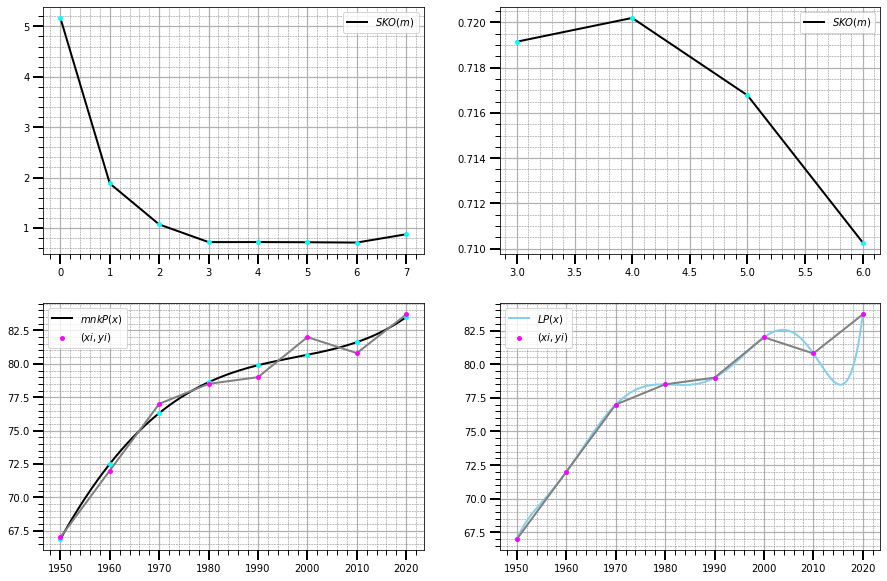

In [31]:
data = np.array([i for i in range(8)])
data1 = ([3, 4, 5, 6])
x_data = np.linspace(1950.0, 2020.0,1000)

#делаем график
fig,axs = plt.subplots(2,2,figsize =(15, 10))

#график среднеквадратичного отклонения по степеням

axs[0][0].scatter(data,SKO_mas,15, color = "cyan", zorder = 10)
axs[0][0].plot(data,SKO_mas, label = f'$SKO(m)$', color = "black", linewidth=2, zorder = 5)

#тот же график, но ближе, для поиска оптимальной степени

axs[0][1].scatter(data1,np.array([SKO(i,x,y) for i in data1]),15, color = "cyan", zorder = 10)
axs[0][1].plot(data1,np.array([SKO(i,x,y) for i in data1]), label = f'$SKO(m)$', color = "black", linewidth=2, zorder = 5)

#график многочлена по МНК  
axs[1][0].scatter(x,mnk_mas,15, color = "cyan", zorder = 10)
axs[1][0].plot(x_data,Px(x_data,a_mnk), label = f'$mnkP(x) $', color = "black", linewidth=2, zorder = 5)

#интерполяционного многочлена
axs[1][1].scatter(x,y, 15, color = "cyan", zorder = 10)
axs[1][1].plot(x_data,Lagrange(x,y,x_data,7), label = f'$LP(x) $', color = "skyblue", linewidth=2, zorder = 5)

#исходные точки, соединенные линией для наглядности
axs[1][0].scatter(x,y, 15,label = f'$(xi,yi) $', color = "magenta", zorder = 10)
axs[1][0].plot(x,y,  color = "gray", linewidth=2, zorder = 5)

axs[1][1].scatter(x,y, 15,label = f'$(xi,yi) $', color = "magenta", zorder = 10)
axs[1][1].plot(x,y, color = "gray", linewidth=2, zorder = 5)


for i in range (2):
    for j in range (2):
        axs[i][j].grid(which="major", linewidth=1.2)
        axs[i][j].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
        axs[i][j].tick_params(which='major', length=10, width=2)
        axs[i][j].tick_params(which='minor', length=5, width=1)
        axs[i][j].xaxis.set_minor_locator(AutoMinorLocator())
        axs[i][j].yaxis.set_minor_locator(AutoMinorLocator())
        axs[i][j].legend()

# Задача 4.2

In [39]:
import math as m
n = 7
#исходныый отрезок
x_data = np.linspace(1.0, 4.0, n+1)

def func(x):
    return 5*x**0.5*np.cos(2*x)

y_data = np.array([func(x_data[i]) for i in range(n+1)])

print(x_data)
print(y_data)

[1.         1.42857143 1.85714286 2.28571429 2.71428571 3.14285714
 3.57142857 4.        ]
[-2.08073418 -5.73599892 -5.72666507 -1.06203529  5.40802897  8.86402426
  6.16730423 -1.45500034]


## Интерполяционные методы
### многочлен Лагранжа 

In [40]:
#Li - слагаемое многочлена, Lt = значение многочлена в точке t, k - степень многочлена
def Lagrange(x_mas, y_mas, t, k):
    Lt = 0
    for i in range(k+1):
        Li = y_mas[i]
        for j in range(k+1):
            Li *= (t - x_mas[j])/(x_mas[i] - x_mas[j]) if i != j else 1  
        Lt += Li
    return Lt   


### многочлен Ньютона с конечными разностями

In [41]:
#fd - конечная разность порядка k, bin_kl - число сочетаний из k по l 
def FD_sigma(y_mas, k):
    fd = 0
    for l in range(k+1):
        bin_kl = m.factorial(k)/(m.factorial(l)*m.factorial(k-l)) 
        fd += (-1)**(k-l)*y_mas[l]*bin_kl
    return fd

#Pi - слагаемое многочлена, Pt = значение многочлена в точке t
#n - степень многочлена
def Newton_fd(x_mas, y_mas, t, n):
    size = x_mas.shape[0]
    h = (x_mas[size - 1] - x_mas[0] )/ (size - 1)
    Pt = 0
    for i in range(n+1):
        Pi = FD_sigma(y_mas, i)/(m.factorial(i)*h**i)
        for j in range(0, i, 1):
            Pi *= (t - x_mas[j])
        Pt += Pi
    return Pt

In [42]:
#абсолютная погрешность
def AbsErr(t, y_) :
    return np.abs(func(t) - y_)

## Графики

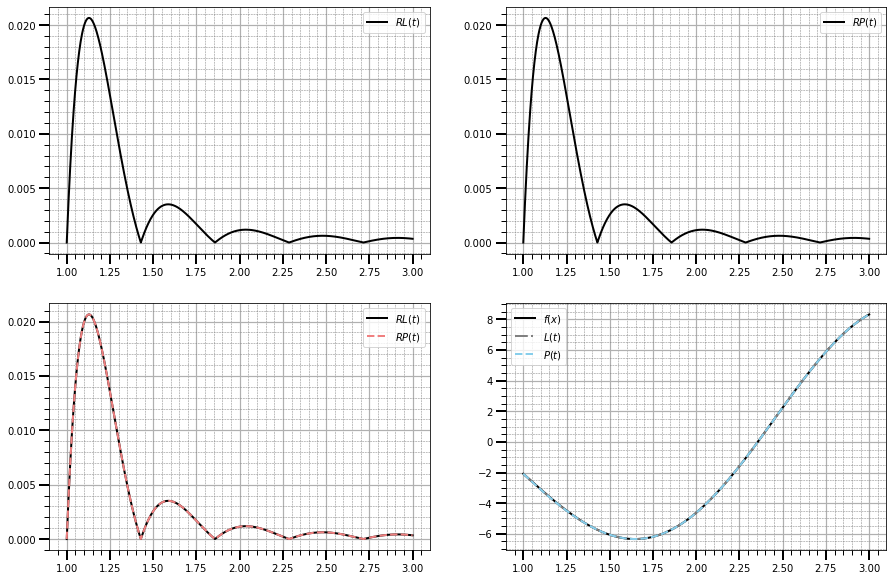

In [43]:
k = n
t = np.linspace(1, 3, 1000)
#делаем график
fig,axs = plt.subplots(2,2,figsize =(15, 10))

#
axs[0][0].plot(t, AbsErr(t, Lagrange(x_data,y_data,t,k)), label = f'$RL(t)$', color = "black", linewidth=2, zorder = 5)

#
axs[0][1].plot(t, AbsErr(t, Newton_fd(x_data,y_data,t,k)), label = f'$RP(t)$', color = "black", linewidth=2, zorder = 5)
#axs[0][1].plot(t, np.abs(Newton_fd(x_data,y_data,t,k-1)- Newton_fd(x_data,y_data,t,k)), label = f'$RP(t)$', color = "blue", linewidth=2, zorder = 5)

#  
axs[1][0].plot(t,AbsErr(t, Lagrange(x_data,y_data,t,k)), label = f'$ RL(t) $', color = "black", linewidth=2, zorder = 5)
axs[1][0].plot(t,AbsErr(t, Newton_fd(x_data,y_data,t,k)), label = f'$ RP(t) $',ls = 'dashed', color = "lightcoral",linewidth=2, zorder = 5)

#
axs[1][1].plot(t,func(t), label = f'$f(x) $', color = "black", linewidth=2, zorder = 5)
axs[1][1].plot(t,Lagrange(x_data,y_data,t,k), label = f'$ L(t) $',ls = 'dashdot', color = "gray", linewidth=2, zorder = 5)
axs[1][1].plot(t,Newton_fd(x_data,y_data,t,k),label = f'$ P(t) $',ls = 'dashed', color = "skyblue", linewidth=2, zorder = 5)

#axs[1][1].plot(t,AbsErr(t, Lagrange(x_data,y_data,t,k)) - AbsErr(t, Newton_fd(x_data,y_data,t,k)), label = f'$- $', color = "black", linewidth=2, zorder = 5)

for i in range (2):
    for j in range (2):
        axs[i][j].grid(which="major", linewidth=1.2)
        axs[i][j].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
        axs[i][j].tick_params(which='major', length=10, width=2)
        axs[i][j].tick_params(which='minor', length=5, width=1)
        axs[i][j].xaxis.set_minor_locator(AutoMinorLocator())
        axs[i][j].yaxis.set_minor_locator(AutoMinorLocator())
        axs[i][j].legend()

# Задача 4.3

## ряд Тейлора в окрестности нуля

In [22]:
def ck(k):
    res = (-1)**m.floor((k % 4) / 2) / m.factorial(k) if (k % 2) != 0 else 0
    return res

def Sum(x,mas):
    res = 0
    k = mas.shape[0]
    for i in range(k):
        c = mas[i]
        res += c*x**i
    return res 

#m - количество коэффициентов        
def c_mas(m):
    cmas = np.zeros(m)
    for i in range(m):
        cmas[i] = ck(i)
    return cmas

#k-максимальная степень x     
def Taylor(x,k):
    s = 0
    mas = c_mas(k+1)
    s = Sum(x,mas)
    return s
    

## Доп. функции

In [23]:
eps = 1e-8
#абсолютная погрешность
def AbsErr1(t, y_) :
    return np.abs(t - y_)

#подбор кол-ва слагаемых    
def min_k(t):
    k_min = 0 
    while (AbsErr1(Taylor(t,k_min),np.sin(t)) > eps):
        k_min+= 1
    return k_min    


## Графики

Выбранна точка x = 1 ,
для которой число слагаемых максимально
Погрешность:  1.5982848378115477e-10
Кол-во слагаемых при котором она достигается: 12
Максимальная степень в разложении: 11


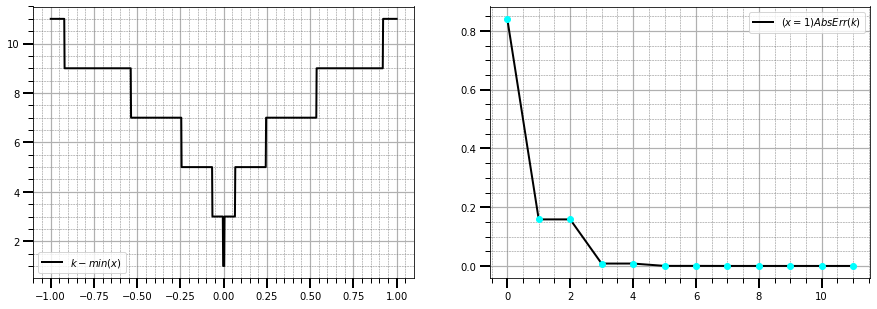

In [24]:
x_d = np.linspace(-1,1, 1000) #отрезок [-1,1]
#делаем график
fig,axs = plt.subplots(1,2,figsize =(15, 5))

#график k_min(числа слагаемых) для каждого x из x_d
axs[0].plot(x_d,np.array([min_k(x_d[i]) for i in range(x_d.shape[0])]), label = f'$k-min(x) $', color = "black", linewidth=2, zorder = 5)

x_ = 1
k_ = min_k(x_)

#k_data - массив степеней разложения,AE_mas - массив погрешностей в выбранной точке для каждой степени 
k_data = np.array([i for i in range (k_+1)])
AE_mas = np.array([AbsErr1(Taylor(x_,i), np.sin(x_)) for i in k_data])

#график погрешности значения в точки x=1 от k=1 до k-min
axs[1].plot(k_data, AE_mas, label = f'$(x=1)AbsErr(k)$', color = "black", linewidth=2, zorder = 5)
axs[1].scatter(k_data, np.array([AbsErr1(Taylor(x_,i), np.sin(x_)) for i in k_data]), color = "cyan", zorder = 10)

print("Выбранна точка x =", x_,",")
print("для которой число слагаемых максимально")
print("Погрешность: ", AbsErr1(Taylor(x_,k_),np.sin(x_)))
print("Кол-во слагаемых при котором она достигается:", k_+1)
print("Максимальная степень в разложении:", k_)


for i in range(2):
    axs[i].grid(which="major", linewidth=1.2)
    axs[i].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
    axs[i].tick_params(which='major', length=10, width=2)
    axs[i].tick_params(which='minor', length=5, width=1)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend()

## Экономизация степенного ряда

[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.66666667e-01
  0.00000000e+00  8.33333333e-03  0.00000000e+00 -1.98412698e-04
  0.00000000e+00  2.75573192e-06]
Погрешность после экономизации:
1.3992773606474884e-10
Экономизация прошла успешно, получили многочлен 9-ой степени
Погрешность после экономизации:
2.7663627493179632e-06
Минимальная степень многочлена 9


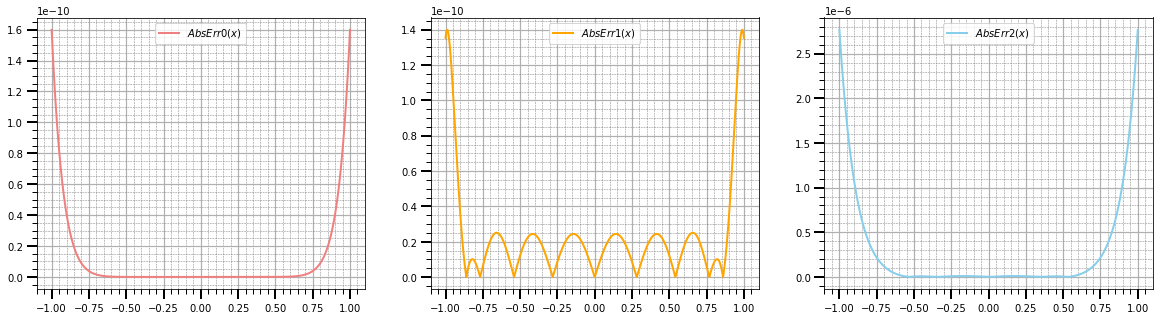

In [25]:
mas_c = c_mas(k_-1)
print(mas_c)

def ec11(x):
    return (2816*x**9-2816*x**7+1232*x**5-220*x**3+11*x)/1024
def ec9(x):
    return (576*x**7-432*x**5+120*x**3-9*x)/256

print("Погрешность после экономизации:")


AE1 = np.amax(AbsErr1(np.sin(x_d),Taylor(x_d,k_-2)+ck(k_)*ec11(x_d)))

print(AE1)

if AE1 <= eps:
    print("Экономизация прошла успешно, получили многочлен 9-ой степени")
else:
    print("Минимальная степень многочлена 11")


#mas_c[11] = 0 
mas_c[9] += 2816/1024 * ck(k_)
mas_c[7] -= 2816/1024 * ck(k_)
mas_c[5] += 1232/1024 * ck(k_)
mas_c[3] -= 220/1024 * ck(k_)
mas_c[1] += 11/1024 * ck(k_)


#AE1 = np.amax(AbsErr1(np.sin(x_d),Sum(x_d,mas_c)))
#print(AE1)

kf9=mas_c[9]
mas_c[9] = 0
print("Погрешность после экономизации:")

#wrong
#AE2 = np.amax(AbsErr1(np.sin(x_d),Taylor(x_d,k_-3)+ck(k_)*ec11(x_d)+ck(k_-2)*ec9(x_d)))

#AE2 = np.amax(AbsErr1(np.sin(x_d),Sum(x_d,mas_c)+kf9*(ec9(x_d)-x_d**9)))
#print(AE2)
AE2 = np.amax(AbsErr1(np.sin(x_d),Taylor(x_d,k_-3)+ck(k_)*ec11(x_d)+ ((ck(k_)*2816)/1024+ck(k_-2))*(ec9(x_d)-x_d**9)))
print(AE2)

if AE2 <= eps:
    print("Экономизация прошла успешно, получили многочлен 7-ой степени")
else:
    print("Минимальная степень многочлена 9")
    
fig,axs = plt.subplots(1,3,figsize =(20, 5))

axs[0].plot(x_d,np.array(AbsErr1(np.sin(x_d),Taylor(x_d,k_))), label = f'$AbsErr0(x) $', color = "lightcoral", linewidth=2, zorder = 5) 
axs[1].plot(x_d,np.array(AbsErr1(np.sin(x_d),Taylor(x_d,k_-1)+ck(k_)*ec11(x_d))), label = f'$AbsErr1(x) $', color = "orange", linewidth=2, zorder = 5)
#axs[2].plot(x_d,np.array(AbsErr1(np.sin(x_d),Taylor(x_d,k_-3)+ck(k_)*ec11(x_d)+ck(k_-2)*ec9(x_d))), label = f'$AbsErr2(x) $', color = "skyblue", linewidth=2, zorder = 5)
axs[2].plot(x_d,np.array(AbsErr1(np.sin(x_d),Taylor(x_d,k_-3)+ck(k_)*ec11(x_d)+((ck(k_)*2816)/1024+ck(k_-2))*(ec9(x_d)-x_d**9))), label = f'$AbsErr2(x) $', color = "skyblue", linewidth=2, zorder = 5)                
for i in range(3):
    axs[i].grid(which="major", linewidth=1.2)
    axs[i].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
    axs[i].tick_params(which='major', length=10, width=2)
    axs[i].tick_params(which='minor', length=5, width=1)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend()
